In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import glob as glb
from glob import glob

In [4]:
coteq1 = sorted(glob('coteq_electricity_20*.csv'))                 #Done
coteq = pd.concat(pd.read_csv(coteq_electricity).assign(year = coteq_electricity[-8:-4],company_name = 'Coteq_electricity')
          for coteq_electricity in coteq1)

In [5]:
rendo2 = sorted(glob('rendo_electricity_20*.csv'))                     #Done
rendo = pd.concat(pd.read_csv(rendo_electricity).assign(year = rendo_electricity[-8:-4],company_name = 'Rendo_electricity')
        for rendo_electricity in rendo2)

In [6]:
rendo['type_of_connection'].fillna(method = 'ffill', inplace= True)
rendo['num_connections'].fillna(method = 'ffill', inplace= True)
rendo['type_conn_perc'].fillna(method = 'ffill', inplace= True)

In [7]:
rendo['delivery_perc'].fillna(rendo.groupby('city')['delivery_perc'].transform('mean'), inplace = True)
rendo['perc_of_active_connections'].fillna(rendo.groupby('city')['perc_of_active_connections'].transform('mean'), inplace = True)

In [8]:
liander3 = sorted(glob('liander_electricity_010120*.csv'))                 #Done
liander= pd.concat(pd.read_csv(liander_electricity).assign(year =liander_electricity[-8:-4],company_name ='Liander_electricity')
          for liander_electricity in liander3)


In [9]:
liander['purchase_area'].fillna(method = 'ffill', inplace = True)  
# Net manager  Liander NB is opreted the purchase ares  'LIANDER'
#'Liander N.V. (NW)'   is  opreat area 'Liander NW'

In [10]:
enexis4 = sorted(glob('enexis_electricity_010120*.csv'))
enexis = pd.concat(pd.read_csv(enexis_electricity).assign(year = enexis_electricity[-8:-4],company_name = 'Enexis_electricity')
          for enexis_electricity in enexis4)

In [11]:
enexis['delivery_perc'].fillna(method = 'ffill', inplace = True)
enexis['type_conn_perc'].fillna(method = 'bfill', inplace = True)  #2010 full'type_of_connection' column nan
enexis['type_of_connection'].fillna(method = 'bfill', inplace = True)

In [12]:
stedin5 = sorted(glob('stedin_electricity_20*.csv'))                        #Done
stedin = pd.concat(pd.read_csv(stedin_electricity).assign(year = stedin_electricity[-8:-4],company_name = 'Stedin_electricity')
          for stedin_electricity in stedin5)


In [13]:
endinet6 = sorted(glob('endinet_electricity_010120*.csv'))
endinet =pd.concat(pd.read_csv(endinet_electricity).assign(year =endinet_electricity[-8:-4],company_name='Endinet_electricity')
          for endinet_electricity in endinet6)

In [14]:
endinet['type_conn_perc'].fillna(endinet.groupby('type_of_connection')['type_conn_perc'].transform('mean'), inplace = True)
endinet['type_conn_perc'].fillna(method = 'ffill', inplace = True)

In [15]:
enduris7 = sorted(glob('enduriselectricity_010120*.csv'))                            #DONE
enduris =pd.concat(pd.read_csv(enduriselectricity).assign(year =enduriselectricity[-8:-4],company_name ='Enduris_electricity')
          for enduriselectricity in enduris7)

In [16]:
enduris['net_manager'].fillna(method = 'ffill' , inplace = True)   # Only one net manager and other empty so use ffill

In [17]:
enduris['type_conn_perc'] = enduris['type_conn_perc'].str.replace(',', '.').astype(float)
# Convert(handle) European decimal separators in 'type_conn_perc' columns

In [18]:
westland8 = sorted(glob('westland-infra_electricity_20*.csv'))           #Done
westland = pd.concat(pd.read_csv(westland_infra).assign(year = westland_infra[-8:-4],company_name = 'Westland_infra')
                    for westland_infra in westland8)


In [19]:
Dataset = pd.concat([liander,stedin,westland,coteq,enduris,enexis,endinet,rendo]) 

In [20]:
Dataset

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year,company_name,STANDAARDDEVIATIE,%Defintieve aansl (NRM),ï»¿NETBEHEERDER
0,Liander N.V. (NW),Liander NW,Rijksweg A44,1000AA,1011AA,NIEUW VENNEP,15.0,100.000000,66.67000,47.0,3x25,12958.0,46.67,0.0,2009,Liander_electricity,NaN,NaN,NaN
1,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AB,1011AB,AMSTERDAM,23.0,100.000000,78.26000,43.0,3x25,14761.0,39.13,0.0,2009,Liander_electricity,NaN,NaN,NaN
2,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AC,1011AC,AMSTERDAM,31.0,100.000000,77.42000,58.0,3x25,12139.0,16.13,0.0,2009,Liander_electricity,NaN,NaN,NaN
3,Liander N.V. (NW),Liander NW,Oosterdokskade,1011AD,1011AD,AMSTERDAM,21.0,100.000000,66.67000,52.0,3x25,5082.0,47.62,0.0,2009,Liander_electricity,NaN,NaN,NaN
4,Liander N.V. (NW),Liander NW,Oosterdokskade AB,1011AE,1011AE,AMSTERDAM,15.0,100.000000,60.00000,93.0,3x25,3712.0,33.33,0.0,2009,Liander_electricity,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,8716912000008,871691280000000008,Burg G W Stroinkweg,8343XK,8343XK,ZUIDVEEN,17.0,95.704712,99.89875,65.0,3x25,5814.0,NaN,NaN,2019,Rendo_electricity,NaN,NaN,NaN
1483,8716912000008,871691280000000008,Burg G W Stroinkweg,8343XL,8343XL,ZUIDVEEN,20.0,95.704712,99.89875,40.0,1x25,11815.0,NaN,NaN,2019,Rendo_electricity,NaN,NaN,NaN
1484,8716912000008,871691280000000008,Burg G W Stroinkweg,8343XM,8343XM,ZUIDVEEN,19.0,95.704712,99.89875,63.0,3x25,4139.0,NaN,NaN,2019,Rendo_electricity,NaN,NaN,NaN
1485,8716912000008,871691280000000008,Leemkoele,8343XN,8343XN,ZUIDVEEN,18.0,95.704712,99.89875,56.0,1x40,2469.0,NaN,NaN,2019,Rendo_electricity,NaN,NaN,NaN


In [21]:
Dataset.drop(columns = ['STANDAARDDEVIATIE','ï»¿NETBEHEERDER','%Defintieve aansl (NRM)'], inplace=True)

In [22]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3952419 entries, 0 to 1486
Data columns (total 16 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   net_manager                   object 
 1   purchase_area                 object 
 2   street                        object 
 3   zipcode_from                  object 
 4   zipcode_to                    object 
 5   city                          object 
 6   num_connections               float64
 7   delivery_perc                 float64
 8   perc_of_active_connections    float64
 9   type_conn_perc                float64
 10  type_of_connection            object 
 11  annual_consume                float64
 12  annual_consume_lowtarif_perc  float64
 13  smartmeter_perc               float64
 14  year                          object 
 15  company_name                  object 
dtypes: float64(7), object(9)
memory usage: 512.6+ MB


In [23]:
Dataset.dropna(inplace=True)                              #Drop the Null values raws

In [24]:
Dataset.isnull().sum()

net_manager                     0
purchase_area                   0
street                          0
zipcode_from                    0
zipcode_to                      0
city                            0
num_connections                 0
delivery_perc                   0
perc_of_active_connections      0
type_conn_perc                  0
type_of_connection              0
annual_consume                  0
annual_consume_lowtarif_perc    0
smartmeter_perc                 0
year                            0
company_name                    0
dtype: int64

In [25]:
Dataset

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year,company_name
0,Liander N.V. (NW),Liander NW,Rijksweg A44,1000AA,1011AA,NIEUW VENNEP,15.0,100.00,66.67,47.0,3x25,12958.0,46.67,0.00,2009,Liander_electricity
1,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AB,1011AB,AMSTERDAM,23.0,100.00,78.26,43.0,3x25,14761.0,39.13,0.00,2009,Liander_electricity
2,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AC,1011AC,AMSTERDAM,31.0,100.00,77.42,58.0,3x25,12139.0,16.13,0.00,2009,Liander_electricity
3,Liander N.V. (NW),Liander NW,Oosterdokskade,1011AD,1011AD,AMSTERDAM,21.0,100.00,66.67,52.0,3x25,5082.0,47.62,0.00,2009,Liander_electricity
4,Liander N.V. (NW),Liander NW,Oosterdokskade AB,1011AE,1011AE,AMSTERDAM,15.0,100.00,60.00,93.0,3x25,3712.0,33.33,0.00,2009,Liander_electricity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4560,Endinet,871688700000002681,Waterfront,5658SC,5658SC,EINDHOVEN,23.0,95.65,100.00,100.0,3x25,4517.0,0.00,0.00,2016,Endinet_electricity
4561,Endinet,871688700000002681,Waterfront,5658SE,5658SE,EINDHOVEN,20.0,100.00,100.00,100.0,1x35,3014.0,0.00,0.00,2016,Endinet_electricity
4562,Endinet,871688700000002681,Waterfront,5658SG,5658SG,EINDHOVEN,25.0,100.00,100.00,96.0,1x35,2746.0,8.00,4.00,2016,Endinet_electricity
4563,Endinet,871688700000002681,Waterfront,5658SH,5658SH,EINDHOVEN,14.0,100.00,100.00,93.0,1x35,3530.0,7.14,0.00,2016,Endinet_electricity


In [26]:
Dataset.shape

(3939151, 16)

# Data Visualization

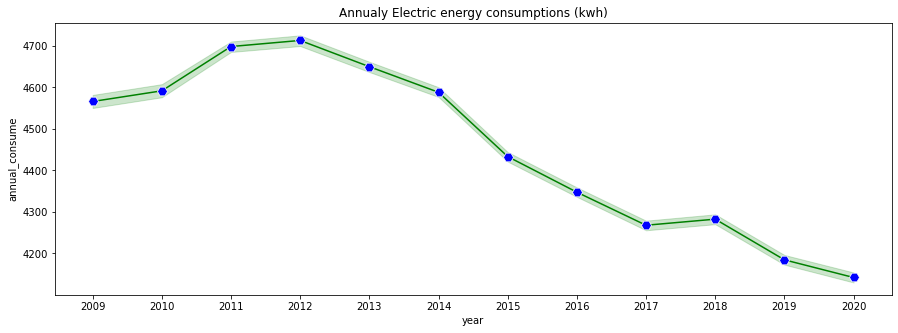

In [27]:
plt.figure(figsize=(15,5))
sns.lineplot(x =Dataset['year'], y=Dataset['annual_consume'], data=Dataset, marker='H', markersize=10,
             markerfacecolor='b',  color='g').set(title='Annualy Electric energy consumptions (kwh)')
plt.show()

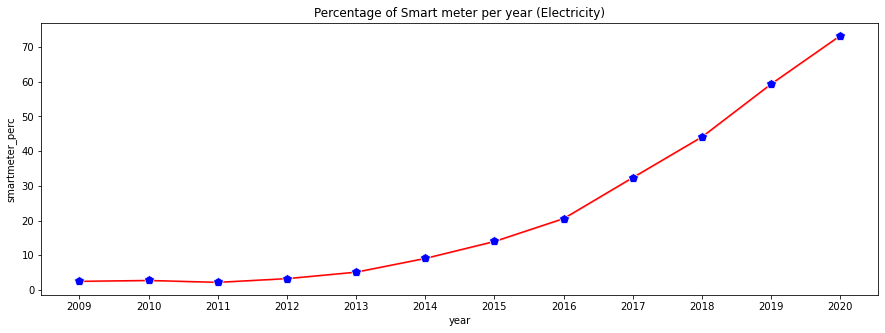

In [28]:
plt.figure(figsize=(15,5))
sns.lineplot(x = Dataset['year'], y = Dataset['smartmeter_perc'], data=Dataset, marker='p',
             markersize=10, markerfacecolor='b', color='r').set(title='Percentage of Smart meter per year (Electricity)')
plt.show()

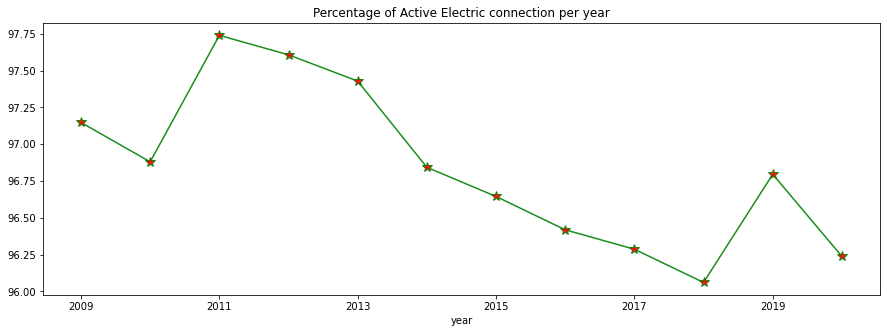

In [29]:
Active_connection_per_year= Dataset.groupby(['year'])['perc_of_active_connections'].mean()
Active_connection_per_year.plot(title='Percentage of Active Electric connection per year',kind='line',
                figsize=(15,5), marker='*', markersize=10, markerfacecolor='r', color='g', alpha=0.9)
plt.show()

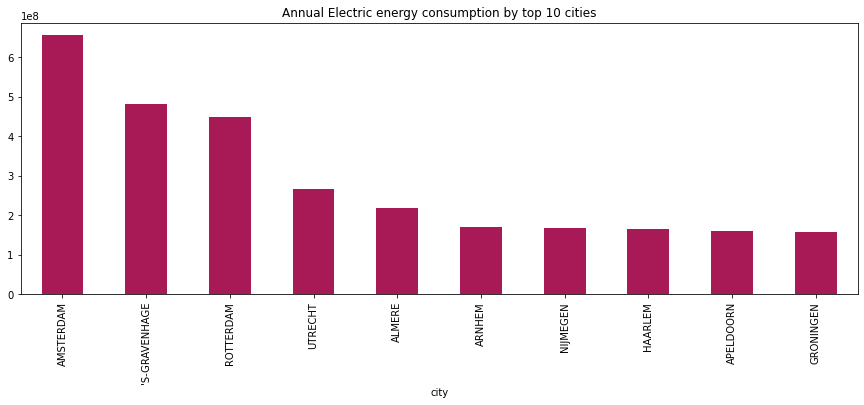

In [30]:
Conume_cities= Dataset.groupby(['city'])['annual_consume'].sum().sort_values(ascending=False).head(10)
Conume_cities.plot(title= 'Annual Electric energy consumption by top 10 cities',kind='bar',
                   figsize=(15,5), cmap='Spectral',alpha=0.9)
plt.show()

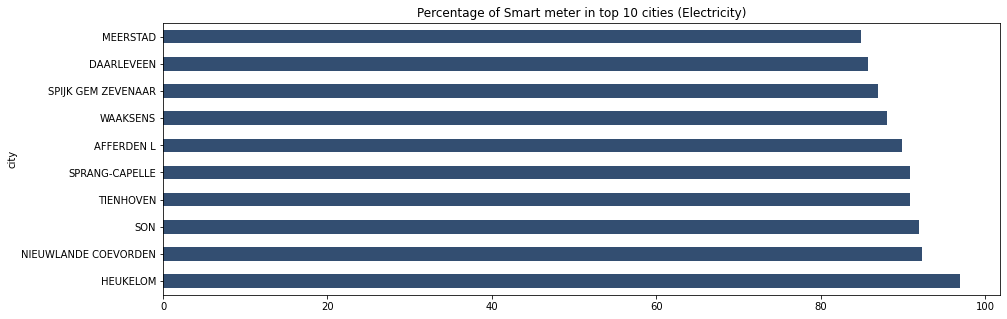

In [31]:
Smartmeter_City = Dataset.groupby(['city'])['smartmeter_perc'].mean().sort_values(ascending=False).head(10)
Smartmeter_City.plot(title='Percentage of Smart meter in top 10 cities (Electricity)', kind='barh', 
                     figsize=(15,5), cmap='cividis', alpha=0.8)
plt.show()

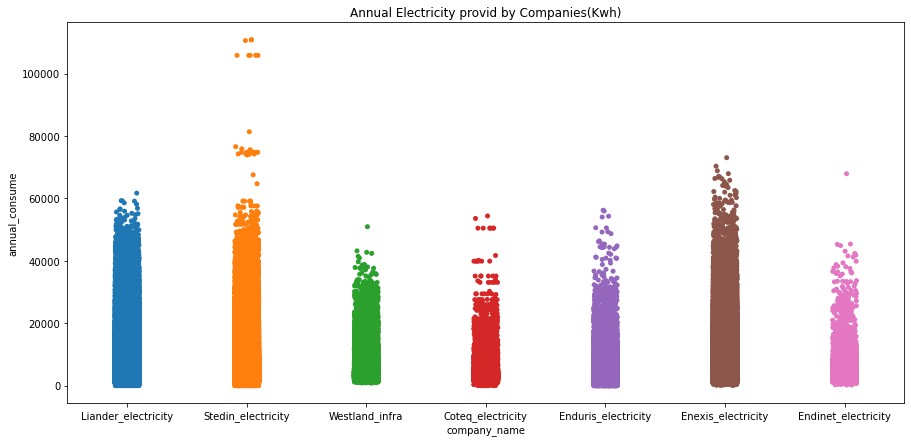

In [32]:
plt.figure(figsize=(15,7))
sns.stripplot(x='company_name', y='annual_consume', data=Dataset, jitter=True).set(title =
                'Annual Electricity provid by Companies(Kwh)')                                
plt.show()

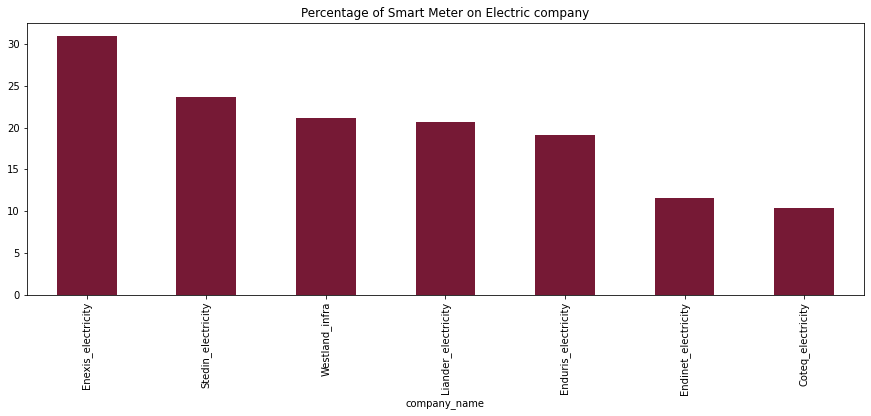

In [33]:
Smartmeter_perc= Dataset.groupby(['company_name'])['smartmeter_perc'].mean().sort_values(ascending=False)
Smartmeter_perc.plot(title= 'Percentage of Smart Meter on Electric company', kind='bar', figsize=(15,5), cmap='RdGy',
                            alpha=0.9)
plt.show()

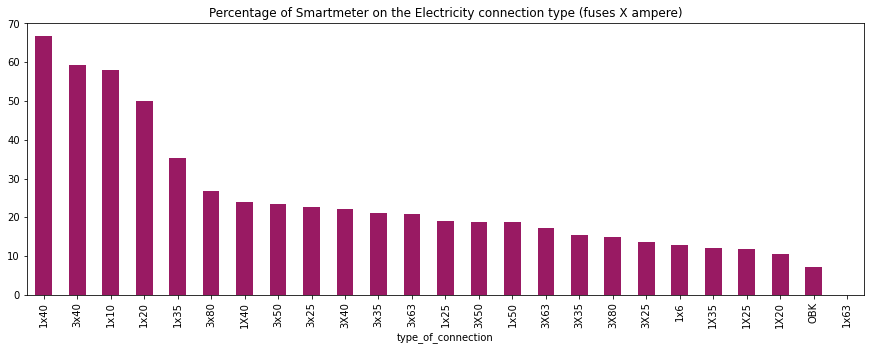

In [34]:
Smartmeter_per_conn= Dataset.groupby(['type_of_connection'])['smartmeter_perc'].mean().sort_values(ascending = False)
Smartmeter_per_conn.plot(title='Percentage of Smartmeter on the Electricity connection type (fuses X ampere)', kind='bar',
                         figsize=(15,5), cmap='PiYG', alpha=0.9)
plt.show()

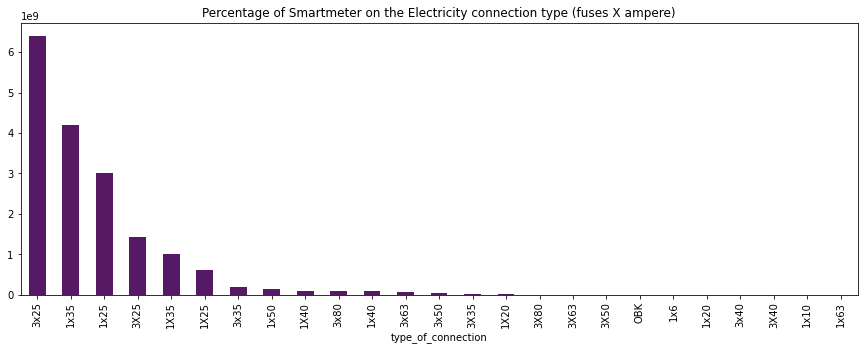

In [35]:
Annual_cons= Dataset.groupby(['type_of_connection'])['annual_consume'].sum().sort_values(ascending = False)
Annual_cons.plot(title='Percentage of Smartmeter on the Electricity connection type (fuses X ampere)', kind='bar',
                         figsize=(15,5), cmap='viridis', alpha=0.9)
plt.show()

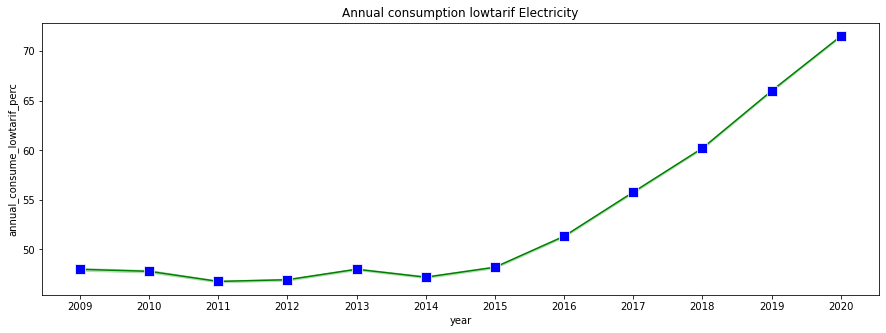

In [36]:
plt.figure(figsize=(15,5))
sns.lineplot(x=Dataset['year'], y=Dataset['annual_consume_lowtarif_perc'], data=Dataset, marker='s', markersize=10,
             markerfacecolor='b', color='g').set(title='Annual consumption lowtarif Electricity')
plt.show()